<h1 style="text-align: center; border:2px solid black;; padding: 7px 5px 7px 5px; margin: 0px;">RIO 125 :FORECASTING SALES OF RETAIL OUTLET</h1>


**Author**: Avadhut Varvatkar <br>
**Creation Date** : 9/10/2023 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Last Modified** : 25/11/2023

# INDEX 
1. [Dataset Description](#1)

2. [Data Preparation](#2)

3. [Data Cleaning](#3)

4. [EXPLORATORY DATA ANALYSIS-EDA](#4)

5. [Stationarity](#5)

6. [Univariate Modelling](#6) 

7. [Multivariate Modelling](#7)

8. [Future Scope](#8)

<a id ='1'></a><br>
# 1 Dataset Description

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

### File descriptions
1. sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
2. test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
3. sample_submission.csv - a sample submission file in the correct format.
4. items.csv - supplemental information about the items/products.
5. item_categories.csv  - supplemental information about the items categories.
6. shops.csv- supplemental information about the shops.
<br> 

### Data fields
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category
<br><br>
This dataset is permitted to be used for any purpose, including commercial use.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('sales_train.csv')
item_cat = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
sample = pd.read_csv('sample_submission.csv')
shop = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

In [3]:
sales.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [4]:
item_cat.head()

item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

In [5]:
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [6]:
sample.head()

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5

In [7]:
shop.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

In [8]:
test.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [9]:
print('sales shape:',sales.shape)
print('item_cat shape:',item_cat.shape)
print('items shape:',items.shape)
print('sample shape',sample.shape)
print('shop shape',shop.shape)
print('test shape',test.shape)

sales shape: (2935849, 6)
item_cat shape: (84, 2)
items shape: (22170, 3)
sample shape (214200, 2)
shop shape (60, 2)
test shape (214200, 3)


<a id='2'></a>
# Data Preparation

For a summarized view of the dataset, we need to merge all these three different dataframes into one single dataframe. This will help in easy and smooth analysis and EDA.

In [10]:
ssales = (sales.merge(items ,on="item_id", how='left'))

In [11]:
ssales.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00           1.0   
1  03.01.2013               0       25     2552      899.00           1.0   
2  05.01.2013               0       25     2552      899.00          -1.0   
3  06.01.2013               0       25     2554     1709.05           1.0   
4  15.01.2013               0       25     2555     1099.00           1.0   

                                  item_name  item_category_id  
0                         ЯВЛЕНИЕ 2012 (BD)                37  
1  DEEP PURPLE  The House Of Blue Light  LP                58  
2  DEEP PURPLE  The House Of Blue Light  LP                58  
3  DEEP PURPLE  Who Do You Think We Are  LP                58  
4   DEEP PURPLE 30 Very Best Of 2CD (Фирм.)                56

In [12]:
print('ssales shape',ssales.shape)

ssales shape (2935849, 8)


In [13]:
ssales.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_name', 'item_category_id'],
      dtype='object')

In [14]:
ssales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   item_name         object 
 7   item_category_id  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 201.6+ MB


convert `date` object to datetime

In [15]:
# Convert to another format (e.g., 'DD-MM-YYYY')
ssales['date'] = pd.to_datetime(ssales['date'], format='%d.%m.%Y')

In [16]:
ssales['date'] = pd.to_datetime(ssales['date'])

In [17]:
ssales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   date_block_num    int64         
 2   shop_id           int64         
 3   item_id           int64         
 4   item_price        float64       
 5   item_cnt_day      float64       
 6   item_name         object        
 7   item_category_id  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 201.6+ MB


In [18]:
ssales.iloc[:,0].unique()

array(['2013-01-02T00:00:00.000000000', '2013-01-03T00:00:00.000000000',
       '2013-01-05T00:00:00.000000000', ...,
       '2015-10-28T00:00:00.000000000', '2015-10-25T00:00:00.000000000',
       '2015-10-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
def uniquevals(col):
    print(f'Unique Values in {col} is : {ssales[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(ssales[col].value_counts())}')
    
    
    
    
for col in ssales.columns:
    valuecounts(col)
    uniquevals(col)
    print("-"*75)

Valuecounts of date is: 1034
Unique Values in date is : ['2013-01-02T00:00:00.000000000' '2013-01-03T00:00:00.000000000'
 '2013-01-05T00:00:00.000000000' ... '2015-10-28T00:00:00.000000000'
 '2015-10-25T00:00:00.000000000' '2015-10-13T00:00:00.000000000']
---------------------------------------------------------------------------
Valuecounts of date_block_num is: 34
Unique Values in date_block_num is : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
---------------------------------------------------------------------------
Valuecounts of shop_id is: 60
Unique Values in shop_id is : [59 25 24 23 19 22 18 21 28 27 29 26  4  6  2  3  7  0  1 16 15  8 10 14
 13 12 53 31 30 32 35 56 54 47 50 42 43 52 51 41 38 44 37 46 45  5 57 58
 55 17  9 49 39 40 48 34 33 20 11 36]
---------------------------------------------------------------------------
Valuecounts of item_id is: 21807
Unique Values in item_id is : [22154  2552  2554 ...  7610  

<a id='3'></a>
# Data Cleaning

In [20]:
import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore', message='SettingWithCopyWarning')


There are some unnecessary columns which we do not need for further data analysis. Dropping those columns.

In [21]:
import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

<AxesSubplot:>

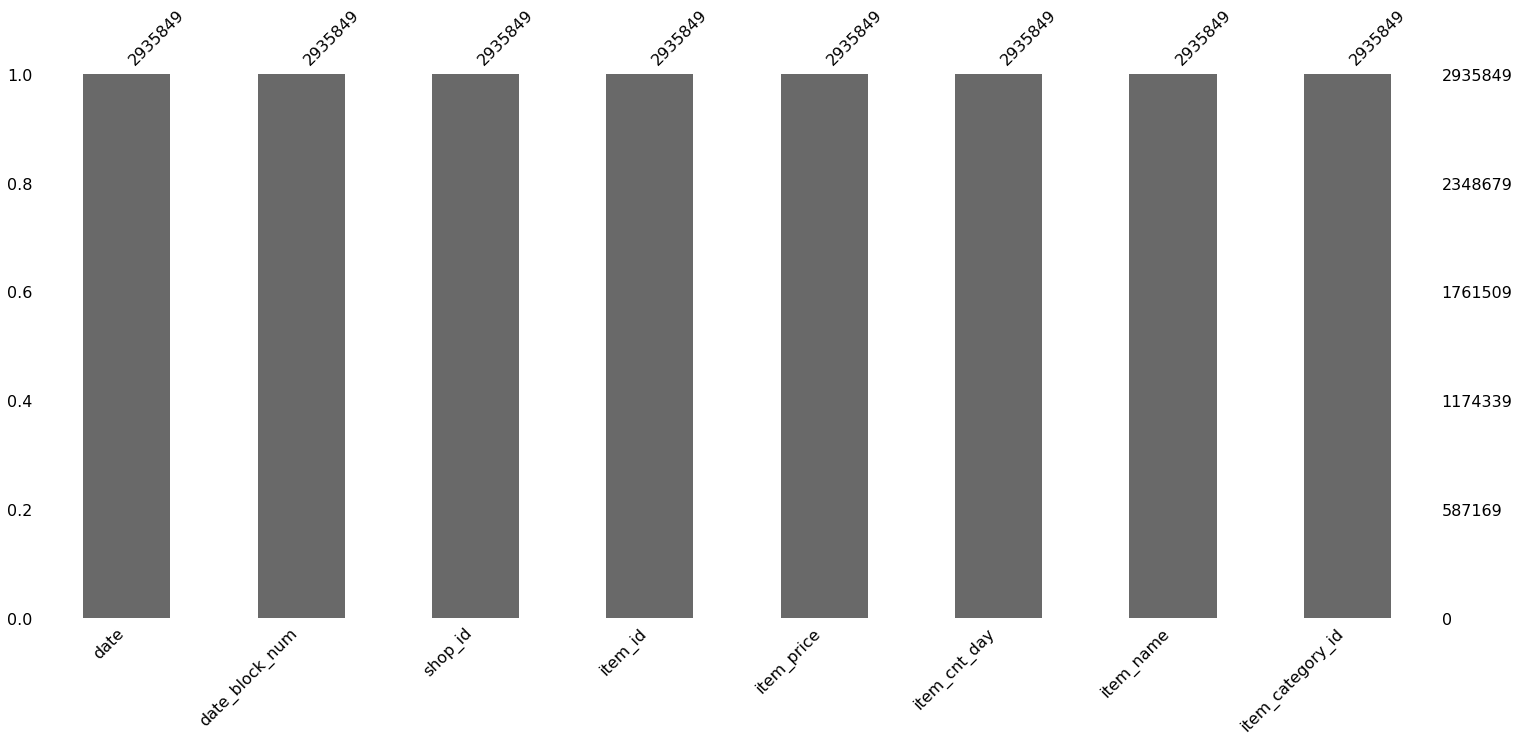

In [22]:
msno.bar(ssales)

In [23]:
'''
so on observation we can see that the null value is not present in Loan Approval Data Set dataset,
as shown ↓
'''
print()
ssales.isna().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
item_name           0
item_category_id    0
dtype: int64

In [24]:
ssales.describe()

date_block_num       shop_id       item_id    item_price  item_cnt_day  \
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06   
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00   
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00   
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01   
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00   
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00   
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00   
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03   

       item_category_id  
count      2.935849e+06  
mean       4.000138e+01  
std        1.710076e+01  
min        0.000000e+00  
25%        2.800000e+01  
50%        4.000000e+01  
75%        5.500000e+01  
max        8.300000e+01

In [25]:
ssales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   date_block_num    int64         
 2   shop_id           int64         
 3   item_id           int64         
 4   item_price        float64       
 5   item_cnt_day      float64       
 6   item_name         object        
 7   item_category_id  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 201.6+ MB


As we can see in the output.

1. There are `2935848` entries
- There are total 8 features `(0 to 7)`
- There are four types of datatype dtypes:  `datetime64(1), float64(2), int64(4), object(1)`
- It's Memory usage that is, memory usage: `179.2+ MB`**
- Also, We can check how many missing values available in the Non-Null Count column

In [26]:
def valuecounts(col):
    print(f'Valuecounts of {col} is: {ssales[col].value_counts()}')

In [27]:
for col in ssales.columns:
    valuecounts(col)
    print('*'*74)

Valuecounts of date is: 2013-12-28    9434
2013-12-29    9335
2014-12-30    9324
2013-12-30    9138
2014-12-31    8347
              ... 
2015-05-14    1174
2015-04-28    1154
2015-10-06    1152
2015-05-13    1128
2015-05-12    1123
Name: date, Length: 1034, dtype: int64
**************************************************************************
Valuecounts of date_block_num is: 11    143246
23    130786
2     121347
0     115690
1     108613
7     104772
6     100548
5     100403
12     99349
10     96736
8      96137
9      94202
3      94109
14     92733
4      91759
13     89830
24     88522
19     86614
22     86428
17     82408
21     79361
18     78760
16     78529
15     77906
20     73157
25     71808
26     69977
31     57029
27     56274
30     55549
29     54617
28     54548
33     53514
32     50588
Name: date_block_num, dtype: int64
**************************************************************************
Valuecounts of shop_id is: 31    235636
25    186104
54    143480
2

**As we can see in the output.**
- the shop_id: 31
have highest number of recordes total record count is: 235636

In [28]:
ssales.shop_id.value_counts()

31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53     52921
16     52734
30     50860
29     49225
38     46013
22     45434
51     44433
52     43502
59     42108
41     41967
37     39638
44     39530
43     39282
4      38242
5      38179
14     36979
45     35891
55     34769
12     34694
2      25991
3      25532
17     22950
48     21612
10     21397
13     17824
49     15849
39     13440
0       9857
32      7947
23      6963
34      5752
1       5678
33      5027
40      4257
9       3751
8       3412
20      1792
11       499
36       306
Name: shop_id, dtype: int64

In [29]:
sales=ssales[ssales['shop_id']==31]

In [30]:
sales.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
60143 2013-01-03               0       31     4906      1794.0           2.0   
60144 2013-01-02               0       31     4906      1789.0           1.0   
60145 2013-01-11               0       31     4890       799.0           1.0   
60146 2013-01-26               0       31     4901      1499.0           1.0   
60147 2013-01-25               0       31     4901      1499.0           1.0   

                                               item_name  item_category_id  
60143  Mortal Kombat. Komplete Edition [PS3, русская ...                19  
60144  Mortal Kombat. Komplete Edition [PS3, русская ...                19  
60145   Mortal Kombat Unchained [PSP, английская версия]                21  
60146      Mortal Kombat [PS Vita, русская документация]                22  
60147      Mortal Kombat [PS Vita, русская документация]                22

In [31]:
sales.tail()

date  date_block_num  shop_id  item_id  item_price  \
2928767 2015-10-01              33       31     1540      1999.0   
2928768 2015-10-07              33       31     1540      1999.0   
2928769 2015-10-10              33       31     1540      1999.0   
2928770 2015-10-23              33       31     1484      1199.0   
2928772 2015-10-26              33       31    11466       249.0   

         item_cnt_day                                          item_name  \
2928767           1.0   Assassin's Creed: Единство [PS4, русская версия]   
2928768           1.0   Assassin's Creed: Единство [PS4, русская версия]   
2928769           1.0   Assassin's Creed: Единство [PS4, русская версия]   
2928770           1.0  Assassin's Creed IV. Черный Флаг (Essentials) ...   
2928772           1.0                       ЖЕНИТЬБА БАЛЬЗАМИНОВА  (rem)   

         item_category_id  
2928767                20  
2928768                20  
2928769                20  
2928770                19  
2928772                40

In [32]:
# Aggregate to monthly level the required metrics

In [33]:
monthly_sales = ssales.groupby(["date_block_num", "item_id"]).agg({
    "date": ["min", "max"],
    "item_price": "mean",
    "item_cnt_day": "sum"
})


## Lets break down the line of code here:
# aggregate by date-block(month),shop_id and item_id
# select the columns date,item_price and item_cnt(sales)
# Provide a dictionary which says what aggregation to perform on which column
# min and max on the date
# average of the item_price
# sum of the sales

# Flatten the MultiIndex columns created after aggregation
monthly_sales.columns = ['_'.join(col).strip() for col in monthly_sales.columns.values]

# Resetting index to make 'date_block_num' and 'item_id' as columns again
monthly_sales.reset_index(inplace=True)

In [34]:
monthly_sales.head(20)

date_block_num  item_id   date_min   date_max  item_price_mean  \
0                0       19 2013-01-12 2013-01-12        28.000000   
1                0       27 2013-01-02 2013-01-19      2325.000000   
2                0       28 2013-01-02 2013-01-19       549.000000   
3                0       29 2013-01-04 2013-01-26      2397.500000   
4                0       32 2013-01-01 2013-01-31       338.110349   
5                0       33 2013-01-01 2013-01-31       488.517241   
6                0       34 2013-01-04 2013-01-26       140.888889   
7                0       35 2013-01-23 2013-01-31       390.709091   
8                0       40 2013-01-03 2013-01-27       219.250000   
9                0       41 2013-01-02 2013-01-27       222.555556   
10               0       42 2013-01-07 2013-01-13       249.000000   
11               0       43 2013-01-06 2013-01-31       234.500000   
12               0       44 2013-01-12 2013-01-27       229.166667   
13               0       45 2013-01-02 2013-01-30       299.000000   
14               0       46 2013-01-11 2013-01-25       249.000000   
15               0       47 2013-01-05 2013-01-27       249.000000   
16               0       48 2013-01-04 2013-01-28       249.000000   
17               0       49 2013-01-19 2013-01-28       249.000000   
18               0       50 2013-01-19 2013-01-25       249.000000   
19               0       51 2013-01-02 2013-01-31       230.461538   

    item_cnt_day_sum  
0                1.0  
1                7.0  
2                8.0  
3                4.0  
4              299.0  
5               61.0  
6                9.0  
7               78.0  
8                4.0  
9                9.0  
10               2.0  
11               2.0  
12               6.0  
13               8.0  
14               2.0  
15               6.0  
16               7.0  
17               5.0  
18               2.0  
19              13.0

Initially, I've elected to forecast the aggregate sales_amount and sales count on a monthly basis for the shop.

Let's begin by calculating the overall sales per month and visualizing this data.

In [35]:
sales['sales_amount']=sales['item_cnt_day']*sales['item_price']

C:\Users\varva\AppData\Local\Temp\ipykernel_12552\3375812261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['sales_amount']=sales['item_cnt_day']*sales['item_price']


In [36]:
sales.set_index('date', inplace=True)

In [37]:
sales= sales.sort_values('date')

In [38]:
sales.resample(rule='BA').max()

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
date                                                                     
2013-12-31              11       31    22167     27990.0         288.0   
2014-12-31              23       31    22167     28990.0         133.0   
2015-12-31              33       31    22167     35991.0         171.0   

                                                    item_name  \
date                                                            
2013-12-31  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...   
2014-12-31  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...   
2015-12-31  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...   

            item_category_id  sales_amount  
date                                        
2013-12-31                83  1.642100e+06  
2014-12-31                83  3.069400e+05  
2015-12-31                83  3.705940e+05

In [39]:
sales.resample(rule='A').min()

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
date                                                                     
2013-12-31               0       31       27        0.10          -1.0   
2014-12-31              12       31       26        0.50          -2.0   
2015-12-31              24       31       30        0.99          -2.0   

                                    item_name  item_category_id  sales_amount  
date                                                                           
2013-12-31  007 Legends [PS3, русская версия]                 2      -10999.0  
2014-12-31   /УМНОЖАЮЩИЙ ПЕЧАЛЬ т.2 (сер.3-4)                 2       -8490.0  
2015-12-31         007: КООРДИНАТЫ «СКАЙФОЛЛ»                 2      -27990.0

In [40]:
sales.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
date                                                                     
2013-01-02               0       31     4248     1993.12           1.0   
2013-01-02               0       31    17241      347.11           1.0   
2013-01-02               0       31    15060      399.00           1.0   
2013-01-02               0       31     7893     1980.00           1.0   
2013-01-02               0       31    11854      199.00           1.0   

                                                    item_name  \
date                                                            
2013-01-02  Kinect Sports Ultimate (только для MS Kinect) ...   
2013-01-02                                   ПОРОЧНАЯ СТРАСТЬ   
2013-01-02   Меч и Магия. Герои 6 [PC, Jewel, русская версия]   
2013-01-02  X360: Геймпад беспроводной черный - Wireless C...   
2013-01-02                                    Змей ВАСЯ 22 см   

            item_category_id  sales_amount  
date                                        
2013-01-02                23       1993.12  
2013-01-02                40        347.11  
2013-01-02                30        399.00  
2013-01-02                 6       1980.00  
2013-01-02                63        199.00

<a id='4'></a>
# EXPLORATORY DATA ANALYSIS

Examining various facets across multiple timeframes offers enhanced clarity and deeper insights into concealed trends and patterns.

In [41]:
sales.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
date                                                                     
2013-01-02               0       31     4248     1993.12           1.0   
2013-01-02               0       31    17241      347.11           1.0   
2013-01-02               0       31    15060      399.00           1.0   
2013-01-02               0       31     7893     1980.00           1.0   
2013-01-02               0       31    11854      199.00           1.0   

                                                    item_name  \
date                                                            
2013-01-02  Kinect Sports Ultimate (только для MS Kinect) ...   
2013-01-02                                   ПОРОЧНАЯ СТРАСТЬ   
2013-01-02   Меч и Магия. Герои 6 [PC, Jewel, русская версия]   
2013-01-02  X360: Геймпад беспроводной черный - Wireless C...   
2013-01-02                                    Змей ВАСЯ 22 см   

            item_category_id  sales_amount  
date                                        
2013-01-02                23       1993.12  
2013-01-02                40        347.11  
2013-01-02                30        399.00  
2013-01-02                 6       1980.00  
2013-01-02                63        199.00

In [42]:
len(sales['item_name'].value_counts())

14416

Text(0.5, 1.0, 'Number of Dependents')

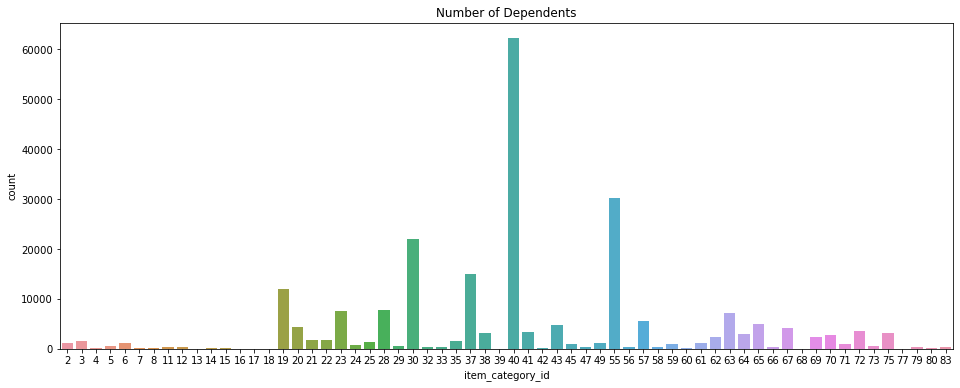

In [43]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'item_category_id', data = sales).set_title('Number of Dependents')

<AxesSubplot:xlabel='date'>

<Figure size 1152x432 with 0 Axes>

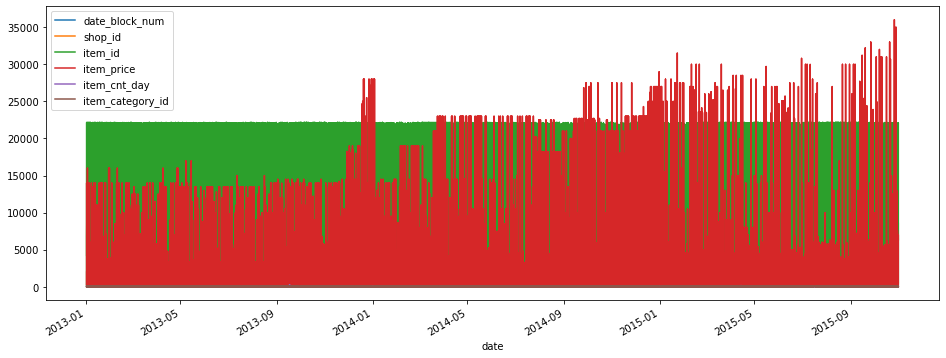

In [44]:
plt.figure(figsize=(16,6))
sales.iloc[:, 0:7].plot(figsize=(16,6))

In [45]:
dsa=sales.groupby(["date"])['sales_amount'].sum().reset_index()

In [46]:
dsa = dsa.set_index('date')

In [47]:
dsa.head()

sales_amount
date                    
2013-01-02     396376.10
2013-01-03     276933.11
2013-01-04     286408.00
2013-01-05     273245.00
2013-01-06     260775.00

In [48]:
df_sa = dsa['sales_amount'].resample('MS').mean()

<AxesSubplot:xlabel='date'>

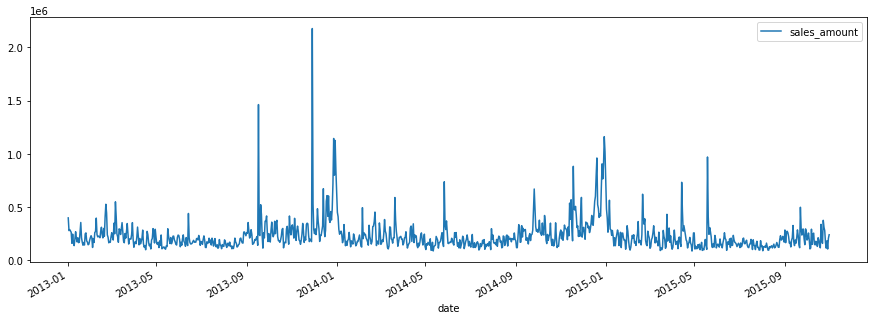

In [49]:
dsa.plot(figsize=(15,5))

<AxesSubplot:xlabel='date'>

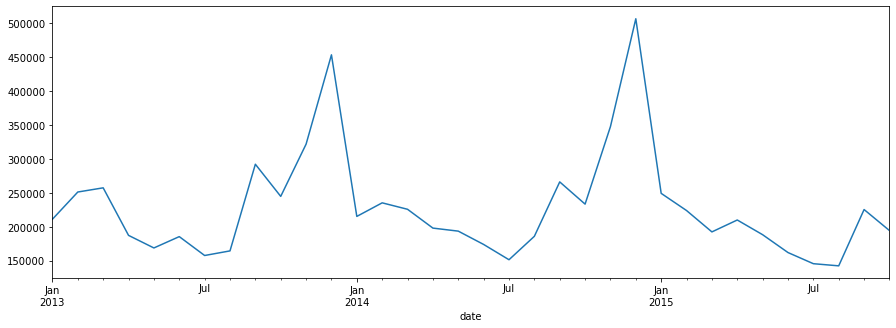

In [50]:
df_sa.plot(figsize=(15,5))

C:\Users\varva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot on Sales amount')

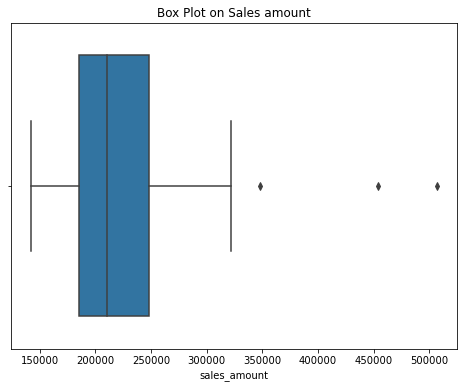

In [51]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(df_sa).set_title('Box Plot on Sales amount')

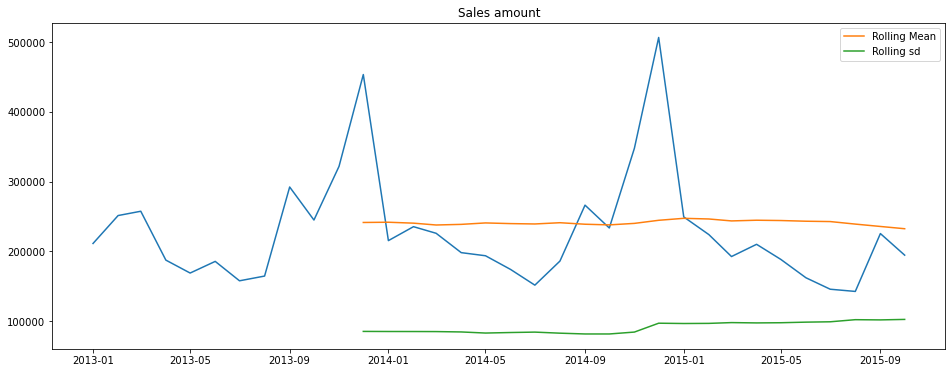

In [52]:
plt.figure(figsize=(16,6))
plt.title('Sales amount')
plt.plot(df_sa)
plt.plot(df_sa.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(df_sa.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

## Cummulative Moving Average

In [53]:
cum_avg=df_sa.expanding().mean()

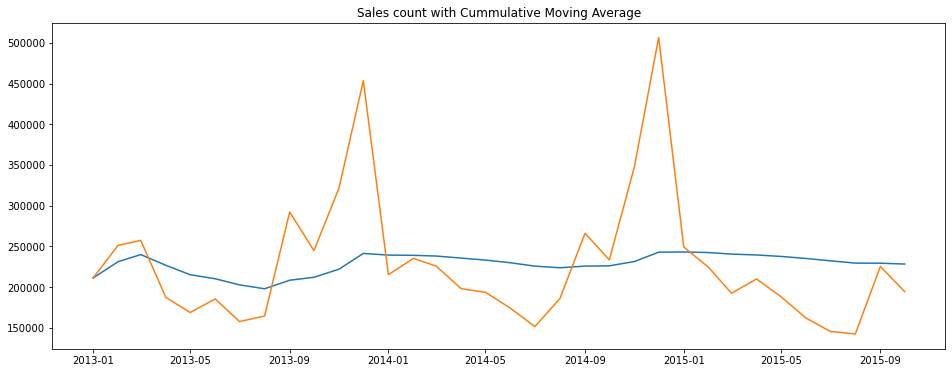

In [54]:
plt.figure(figsize=(16,6))
plt.title('Sales count with Cummulative Moving Average')
plt.plot(cum_avg)
plt.plot(df_sa)

## Exponential Moving Average

In [55]:
ewa_o1 = df_sa.ewm(alpha=0.1,adjust=False).mean()
ewa_o2 = df_sa.ewm(alpha=0.2,adjust=False).mean()
ewa_o5 = df_sa.ewm(alpha=0.5,adjust=False).mean()
ewa_o7 = df_sa.ewm(alpha=0.01,adjust=False).mean()

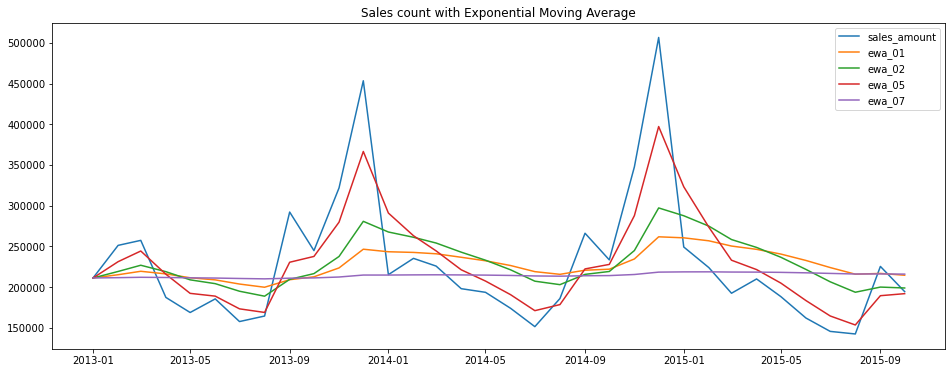

In [56]:
plt.figure(figsize=(16,6))
plt.title('Sales count with Exponential Moving Average')
plt.plot(df_sa,label='sales_amount')
plt.plot(ewa_o1,label='ewa_01');
plt.plot(ewa_o2,label='ewa_02');
plt.plot(ewa_o5,label='ewa_05');
plt.plot(ewa_o7,label='ewa_07');
plt.legend()

<a id="5"></a>
# Stationarity


Stationarity defines the stability of a series over time, indicating that its characteristics remain constant irrespective of when the observations occur. In simpler terms, it implies that the relationship between two points within a time series depends solely on their temporal distance and not on the direction (whether forward or backward).

Achieving stationarity in a time series simplifies the modeling process. Many statistical modeling techniques necessitate or assume the time series to exhibit stationarity.

Various tests, such as the Augmented Dickey-Fuller Test (ADF), KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test, and Phillips-Perron (PP) test, exist to assess stationarity. Among these, the ADF test stands as the most commonly employed method.

Upon performing transformations, if the p-value obtained from the DF test falls well within the 5% significance level, we infer the series' stationarity. To revert to the original series, an inverse transform function is readily available.

Now, equipped with the confirmation of stationarity, let's delve into generating forecasts!

Fuller test is a type of statistical test called a unit root test. It tests the null hypothesis that alpha=1 in the following model equation. alpha is the coefficient of the first lag on Y.
1. Null Hypothesis (Ho): Suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
2. Alternate Hypothesis (Ha): Suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
- P_value > 0.05 : Failure to reject the Null Hypothesis.
- p_value < 0.05 : Reject the Null Hypothesis and Accept the Alternate Hypothesis.

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [59]:
#sales amount
adf_test(df_sa)

ADF Statistics: -8.63044263956278
p- value: 5.774994011252055e-14
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [60]:
df = pd.DataFrame(df_sa)

In [61]:
df.head()

sales_amount
date                     
2013-01-01  211140.623667
2013-02-01  251200.607143
2013-03-01  257349.652258
2013-04-01  187279.800000
2013-05-01  168734.645161

In [62]:
## Use Techniques Differencing
df['First Difference']=df['sales_amount']-df['sales_amount'].shift(1)

In [63]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -20.267687187232205
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


[]

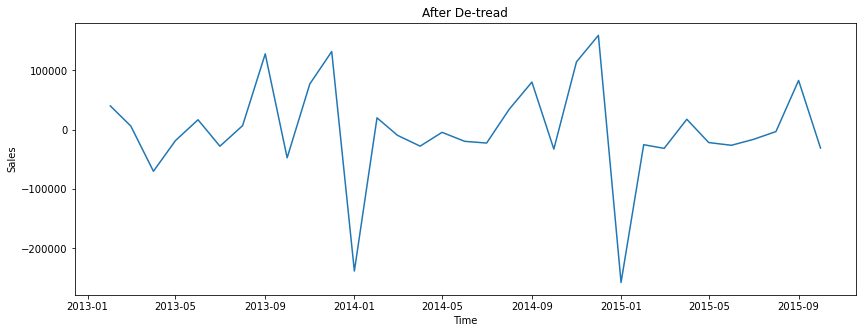

In [64]:
plt.figure(figsize=(14,5))
plt.title('After De-tread')
plt.xlabel('Time')
plt.ylabel('Sales')      # assuming the seasonality is 12 months long
plt.plot(df['First Difference'])
plt.plot()

In [65]:
df['12 Difference']=df['sales_amount']-df['sales_amount'].shift(12)

In [66]:
adf_test(df['12 Difference'].dropna())

ADF Statistics: -8.620184771420998
p- value: 6.135006541781911e-14
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


[]

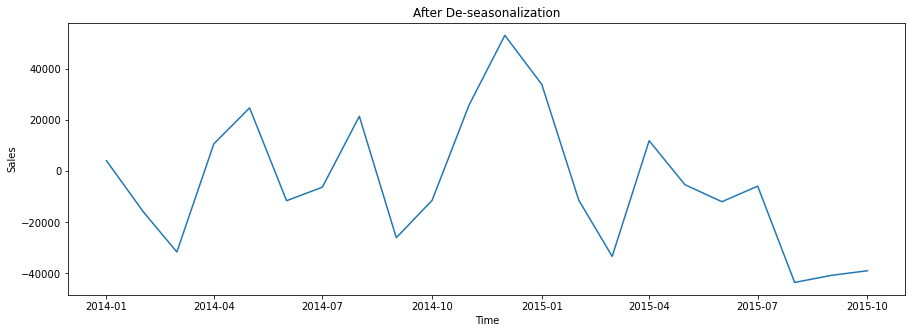

In [67]:
plt.figure(figsize=(15,5))
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')     # assuming the seasonality is 12 months long
plt.plot(df[['12 Difference']])
plt.plot()

In [68]:
df['Second Difference']=df['First Difference']-df['First Difference'].shift(1)

In [69]:
adf_test(df['Second Difference'].dropna())

ADF Statistics: -11.810398072473873
p- value: 8.888980613977285e-22
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


[]

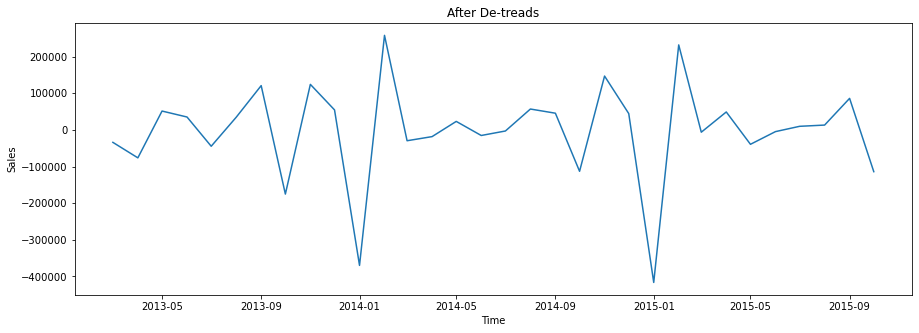

In [70]:
plt.figure(figsize=(15,5))
plt.title('After De-treads')
plt.xlabel('Time')
plt.ylabel('Sales')     # assuming the seasonality is 12 months long
plt.plot(df[['Second Difference']])
plt.plot()

[]

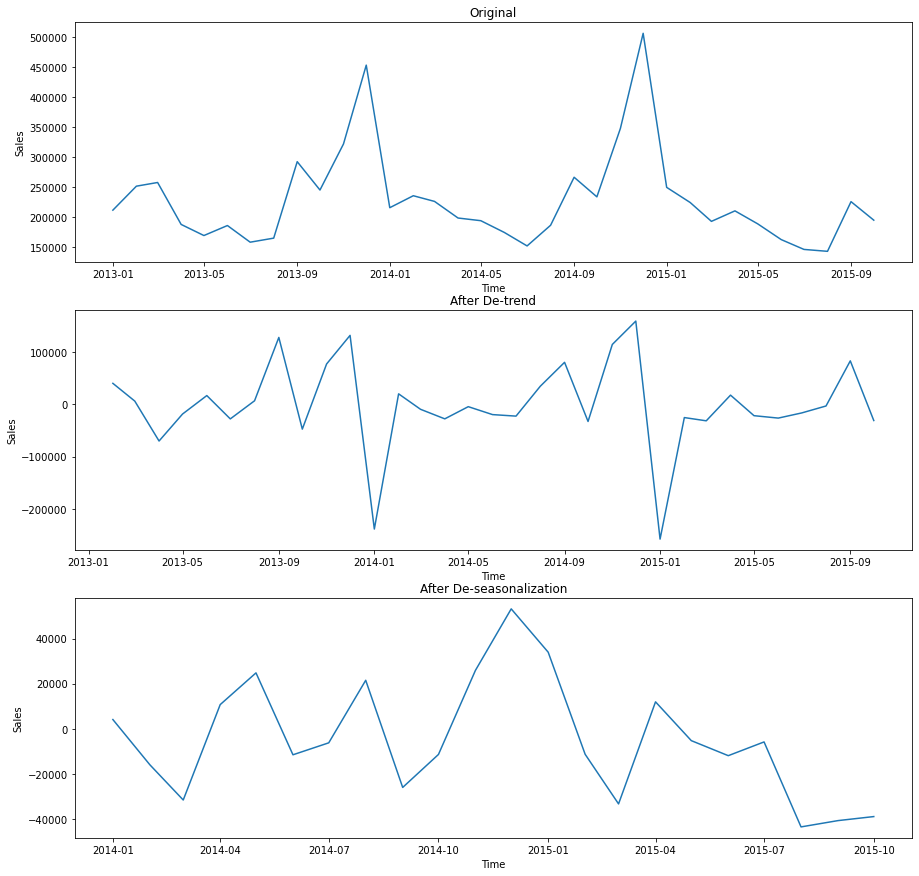

In [71]:
df_sa.astype('float')
plt.figure(figsize=(15,15))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(df_sa)

plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(df['First Difference'])
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(df[['12 Difference']])       # assuming the seasonality is 12 months long
plt.plot()

# Univariate Modelling
<a id="6"></a>

## Plotting Auto-Correlation Chart (ACF) and Partial Correlation Chart(PACF)

In [72]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

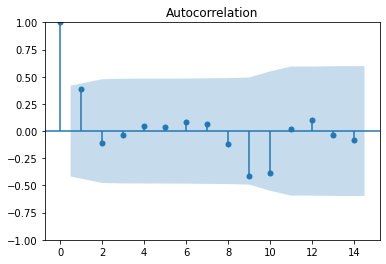

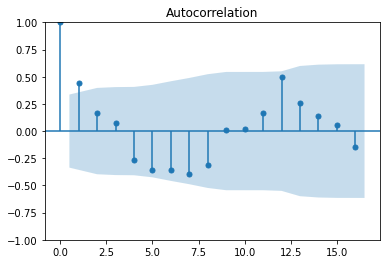

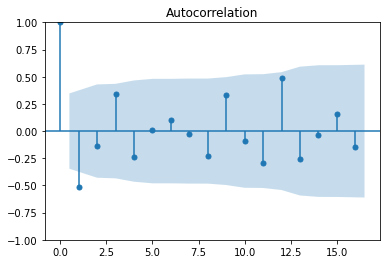

In [73]:
acf = plot_acf(df['12 Difference'].dropna())
acf = plot_acf(df["sales_amount"].dropna())
acf = plot_acf(df["Second Difference"].dropna())

C:\Users\varva\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


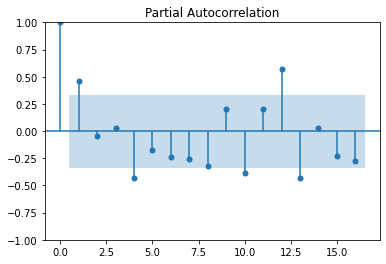

In [74]:
pacf = plot_pacf(df["sales_amount"].dropna())

From the ACF Chart, it is clear that the strongest lags occur at 0 and 1.

Similarly, from the PACF, the strongest lag occur at 1 and 2.

Let's create simple ARIMA model using combination of these above values and see which performs best.

# Creating ARIMA MODEL
ARIMA stands for Autoregressive Integrated Moving Average. It is a widely used and powerful statistical method for time series forecasting and analysis.

**ARIMA model** is a combination of three components:

1. **AutoRegressive (AR) part:** This component models the relationship between an observation and a number of lagged observations (also known as autoregressive terms). It uses the dependency between an observation and its previous observations at fixed intervals.

2. **Integrated (I) part:** This component accounts for differencing the time series to make it stationary. Stationarity is essential in time series analysis, and the integrated part represents the number of differences needed to achieve stationarity.

3. **Moving Average (MA) part:** This component models the relationship between an observation and a residual error from a moving average model applied to lagged observations.

The ARIMA model is represented by the notation ARIMA(p, d, q), where:

- **p:** The order of the autoregressive (AR) part, indicating how many lagged observations are used in the model.
- **d:** The degree of differencing required to make the time series stationary.
- **q:** The order of the moving average (MA) part, indicating the size of the moving average window.

The ARIMA model is versatile and can handle a wide range of time series data, allowing analysts to capture different patterns and trends present in the data. It's widely used in various fields such as finance, economics, weather forecasting, and many others for making predictions and understanding the underlying patterns in time-dependent data.

It's important to note that while ARIMA is a powerful tool, its effectiveness depends on the appropriate selection of parameters (p, d, q) and the underlying characteristics of the time series being analyzed. Often, a process known as model identification and tuning is required to determine the optimal values for these parameters.

In [75]:
len(df_sa)

34

In [76]:
train_amount = df_sa.iloc[:25]
test_amount = df_sa.iloc[25:]

In [77]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from pmdarima import auto_arima
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [79]:
model_amount = auto_arima(df_sa,m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=512.763, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=514.688, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=515.819, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=511.809, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=512.549, Time=0.08 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=512.491, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=514.332, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=515.117, Time=0.11 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=516.955, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 3.416 seconds


In [80]:
model_amount.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   34
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -254.905
Date:                  Sat, 25 Nov 2023   AIC                            511.809
Time:                          16:59:12   BIC                            512.900
Sample:                      01-01-2013   HQIC                           512.066
                           - 10-01-2015                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.797e+08   1.93e+08      3.010      0.003    2.02e+08    9.57e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.82   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.05   Prob(JB):                         0.66
Heteroskedasticity (H):               2.50   Skew:                             0.39
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
model_amount

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [82]:
import statsmodels.api as sm

In [83]:
model = sm.tsa.arima.ARIMA(train_amount, order=(1,2,5))
model_Arima_fit = model.fit()

C:\Users\varva\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [84]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           sales_amount   No. Observations:                   25
Model:                 ARIMA(1, 2, 5)   Log Likelihood                -298.697
Date:                Sat, 25 Nov 2023   AIC                            611.395
Time:                        16:59:13   BIC                            619.343
Sample:                    01-01-2013   HQIC                           613.394
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2913      2.816      0.103      0.918      -5.228       5.811
ma.L1         -1.4061      2.551     -0.551      0.581      -6.405       3.593
ma.L2          0.3130      2.800      0.112      0.911      -5.174       5.800
ma.L3          0.4960      1.107      0.448      0.654      -1.674       2.666
ma.L4         -0.6945      1.810     -0.384      0.701      -4.242       2.853
ma.L5          0.3612      1.126      0.321      0.748      -1.846       2.568
sigma2      1.734e+10   3.41e-10   5.09e+19      0.000    1.73e+10    1.73e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.78   Prob(JB):                         0.85
Heteroskedasticity (H):               1.69   Skew:                            -0.26
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  6e+36. Standard errors may be unstable.
"""

In [85]:
start = len(train_amount)
end = len(train_amount) + len(test_amount) - 1

In [86]:
pred=model_Arima_fit.predict(start,end)
residuals=test_amount-pred

In [87]:
pred

2015-02-01    279634.056798
2015-03-01    339686.957613
2015-04-01    235344.045334
2015-05-01    279898.212167
2015-06-01    295076.216533
2015-07-01    301698.302297
2015-08-01    305828.444357
2015-09-01    309232.798373
2015-10-01    312425.763871
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:ylabel='Density'>

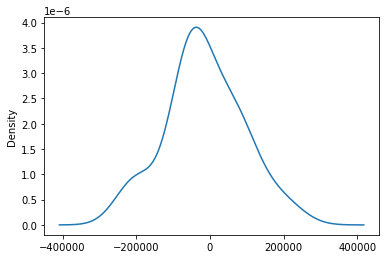

In [88]:
model_Arima_fit.resid.plot(kind='kde')

Text(0.5, 1.0, ' Sales in amount')

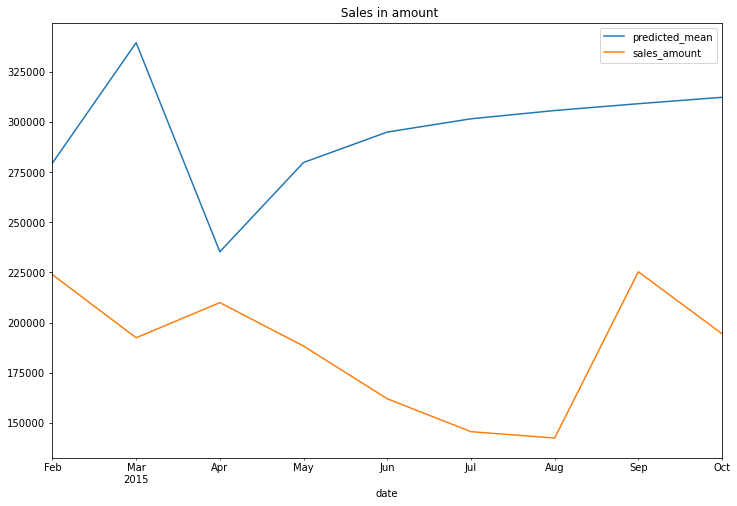

In [89]:
pred.plot(legend=True)
test_amount.plot(figsize=(12,8),legend=True)
plt.title(" Sales in amount")

In [90]:
model_amount

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

# Creating an SARIMA Model

The Seasonal AutoRegressive Integrated Moving Average (SARIMA) model is an extension of the ARIMA (AutoRegressive Integrated Moving Average) model that incorporates seasonality into time series forecasting. SARIMA models are particularly useful for analyzing and forecasting time series data that exhibit seasonal patterns or trends.

The SARIMA model is defined by several components:

1. **Seasonal Component (S):** SARIMA accounts for seasonality in the data. This component involves repeating patterns or cycles occurring over fixed intervals (e.g., daily, weekly, monthly). The seasonal component is denoted by \(S\) and is usually represented by the number of seasonal periods (e.g., 12 for monthly data if the season is yearly).

2. **Non-Seasonal Components (p, d, q):** Similar to ARIMA models, SARIMA includes non-seasonal components:
   - \(p\) represents the autoregressive (AR) order, which captures the relationship between an observation and a certain number of lagged observations.
   - \(d\) denotes the differencing order needed to make the series stationary.
   - \(q\) indicates the moving average (MA) order, which captures the dependency between an observation and a residual error from a moving average model applied to lagged observations.

3. **Seasonal Non-Seasonal Components (P, D, Q):** SARIMA also includes seasonal non-seasonal components similar to \(p\), \(d\), and \(q\), but applied to the seasonal part of the series:
   - \(P\) denotes the seasonal autoregressive order.
   - \(D\) represents the seasonal differencing order.
   - \(Q\) indicates the seasonal moving average order.

The notation for a SARIMA model is typically expressed as SARIMA(\(p, d, q\))(\(P, D, Q\))\(_S\), where:
- \(p, d, q\) are the non-seasonal orders.
- \(P, D, Q\) are the seasonal orders.
- \(S\) represents the length of the seasonal cycle (e.g., monthly seasonality might use \(S=12\) for yearly cycles).

SARIMA models are versatile and capable of capturing both the trend and seasonality in time series data. They are widely used in various fields, including economics, finance, and climate forecasting, to analyze and forecast data with both seasonal and non-seasonal patterns. These models help account for and predict the complex behavior of time series data with multiple components.

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_amount = SARIMAX(train_amount,order=(0, 0, 0),seasonal_order=(0, 1, 0, 12),enforce_invertibility=False)
result_amount = model_amount.fit()
result_amount.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:             sales_amount   No. Observations:                   25
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -150.281
Date:                  Sat, 25 Nov 2023   AIC                            302.563
Time:                          16:59:14   BIC                            303.128
Sample:                      01-01-2013   HQIC                           302.446
                           - 01-01-2015                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.877e+08   1.78e+08      2.740      0.006    1.39e+08    8.37e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.62   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.20   Prob(JB):                         0.74
Heteroskedasticity (H):               3.45   Skew:                             0.26
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

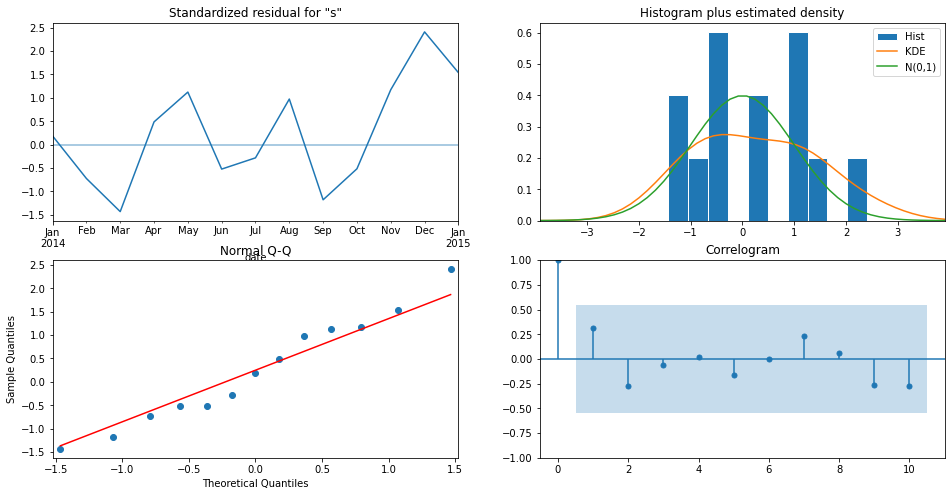

In [92]:
result_amount.plot_diagnostics(figsize=(16,8))
plt.show()

In [93]:
prediction_amount = result_amount.predict(start,end).rename('SARIMA model predictions')

<AxesSubplot:>

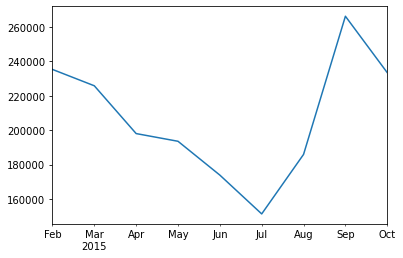

In [94]:
prediction_amount.plot()

Text(0.5, 1.0, ' Sales in amount')

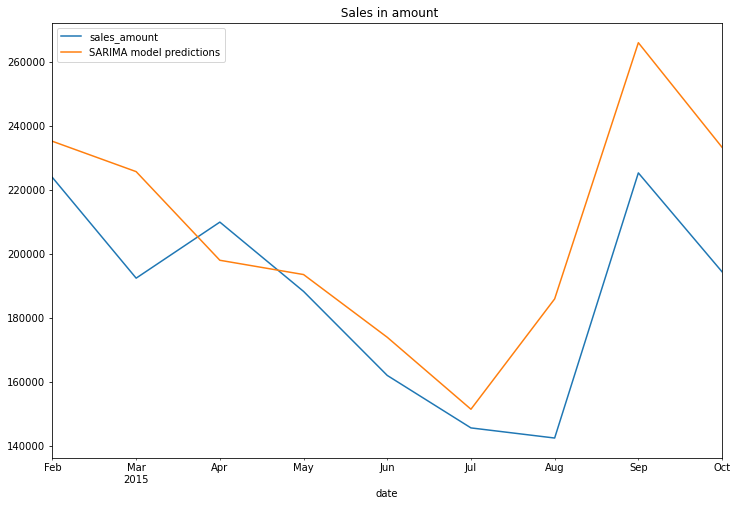

In [95]:
test_amount.plot(figsize=(12,8),legend=True)
prediction_amount.plot(legend=True)
plt.title(" Sales in amount")

Text(0.5, 1.0, ' Sales in amount')

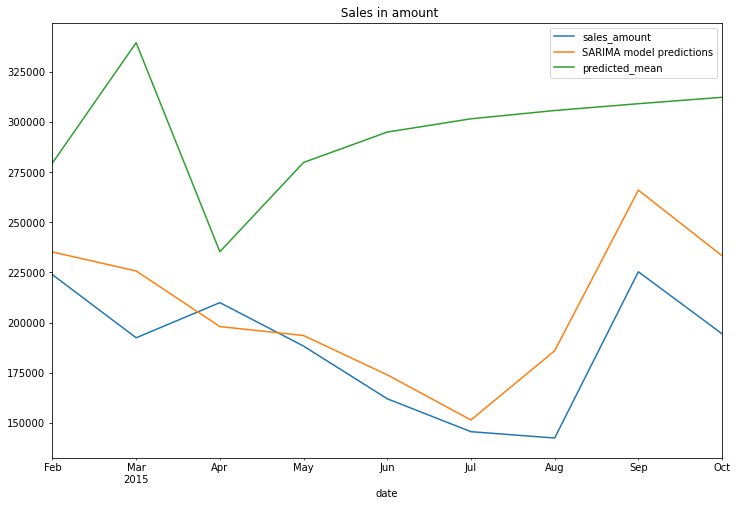

In [96]:
test_amount.plot(figsize=(12,8),legend=True)
prediction_amount.plot(legend=True)
pred.plot(legend=True)
plt.title(" Sales in amount")

In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [98]:
mean_squared_error(test_amount,prediction_amount)

740205372.4692397

In [99]:
rmse(test_amount,prediction_amount)

27206.71557665937

In [100]:
test_amount.mean()

187119.89954983347

In [101]:
model_amount_final = SARIMAX(df_sa,order=(0, 0, 0),seasonal_order=(0, 1, 0, 12),enforce_invertibility=False)

In [102]:
result_amount_final = model_amount_final.fit()

In [103]:
forecast_amount = result_amount_final.predict(len(df_sa),len(df_sa)+11,typ='levels').rename('SARIMA forecast')

Text(0.5, 1.0, 'Sales in amount')

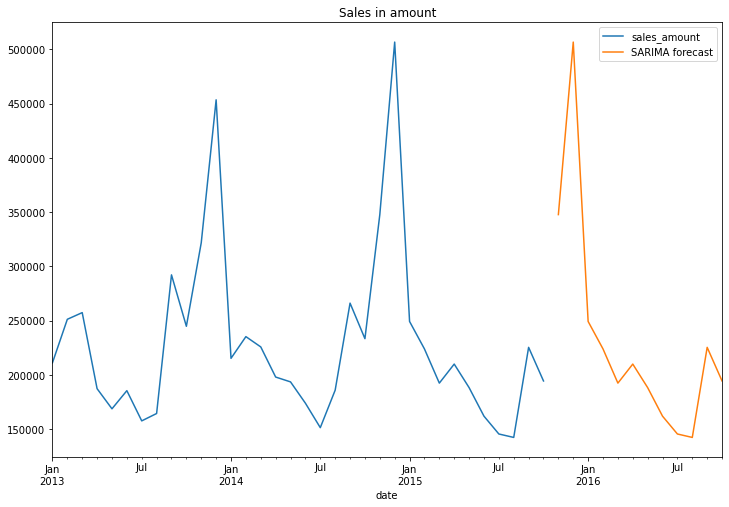

In [104]:
df_sa.plot(legend=True,figsize=(12,8))
forecast_amount.plot(legend=True)
plt.title("Sales in amount")

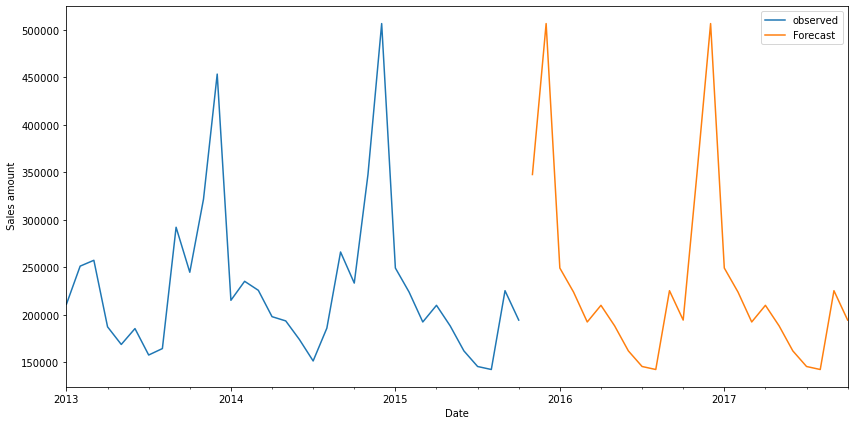

In [105]:
pred_amount = result_amount_final.get_forecast(steps=24)
pred_ci_amount = pred_amount.conf_int()
ax = df_sa.plot(label='observed',figsize=(14,7))
pred_amount.predicted_mean.plot(ax=ax,label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel(' Sales amount')
plt.legend()
plt.show()

<a id ='7'></a>
# Time series modelling with prophet

In [106]:
pip install prophet --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
from prophet import Prophet

In [108]:
df = df_sa.to_frame()
df.head()

sales_amount
date                     
2013-01-01  211140.623667
2013-02-01  251200.607143
2013-03-01  257349.652258
2013-04-01  187279.800000
2013-05-01  168734.645161

In [109]:
df['ds'] = df.index

In [110]:
df.columns = ['y','ds']

In [111]:
df.head()

y         ds
date                                
2013-01-01  211140.623667 2013-01-01
2013-02-01  251200.607143 2013-02-01
2013-03-01  257349.652258 2013-03-01
2013-04-01  187279.800000 2013-04-01
2013-05-01  168734.645161 2013-05-01

In [112]:
model = Prophet()

In [113]:
model.fit(df)

16:59:36 - cmdstanpy - INFO - Chain [1] start processing
16:59:37 - cmdstanpy - INFO - Chain [1] done processing


In [114]:
future = model.make_future_dataframe(periods=24,freq='MS')

In [115]:
future

ds
0  2013-01-01
1  2013-02-01
2  2013-03-01
3  2013-04-01
4  2013-05-01
5  2013-06-01
6  2013-07-01
7  2013-08-01
8  2013-09-01
9  2013-10-01
10 2013-11-01
11 2013-12-01
12 2014-01-01
13 2014-02-01
14 2014-03-01
15 2014-04-01
16 2014-05-01
17 2014-06-01
18 2014-07-01
19 2014-08-01
20 2014-09-01
21 2014-10-01
22 2014-11-01
23 2014-12-01
24 2015-01-01
25 2015-02-01
26 2015-03-01
27 2015-04-01
28 2015-05-01
29 2015-06-01
30 2015-07-01
31 2015-08-01
32 2015-09-01
33 2015-10-01
34 2015-11-01
35 2015-12-01
36 2016-01-01
37 2016-02-01
38 2016-03-01
39 2016-04-01
40 2016-05-01
41 2016-06-01
42 2016-07-01
43 2016-08-01
44 2016-09-01
45 2016-10-01
46 2016-11-01
47 2016-12-01
48 2017-01-01
49 2017-02-01
50 2017-03-01
51 2017-04-01
52 2017-05-01
53 2017-06-01
54 2017-07-01
55 2017-08-01
56 2017-09-01
57 2017-10-01

In [116]:
forecast = model.predict(future)

In [117]:
forecast

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2013-01-01  242070.977329  205302.096673  218140.038828  242070.977329   
1  2013-02-01  241405.313113  247657.543601  260545.129549  241405.313113   
2  2013-03-01  240804.068098  253005.133408  265309.806327  240804.068098   
3  2013-04-01  240138.403964  178973.812121  191434.586671  240138.403964   
4  2013-05-01  239494.212892  162293.700449  175488.816604  239494.212892   
5  2013-06-01  238828.548827  172334.753545  184914.288035  238828.548827   
6  2013-07-01  238184.094636  143815.587731  156439.841771  238184.094636   
7  2013-08-01  237518.158305  161449.900482  173994.694729  237518.158305   
8  2013-09-01  236852.221917  281018.151846  294105.286246  236852.221917   
9  2013-10-01  236207.767387  237141.522050  250153.294047  236207.767387   
10 2013-11-01  235541.831039  320126.530109  333771.215120  235541.831039   
11 2013-12-01  234904.946336  453936.152895  466844.970907  234904.946336   
12 2014-01-01  235838.328141  214778.553979  227625.251947  235838.328141   
13 2014-02-01  236786.352923  228536.467578  241359.515639  236786.352923   
14 2014-03-01  237642.633372  218269.350504  230409.811400  237642.633372   
15 2014-04-01  238590.696473  193233.372213  205862.519723  238590.696473   
16 2014-05-01  239508.177084  180607.068909  193672.510758  239508.177084   
17 2014-06-01  240456.240445  172969.038401  185975.739533  240456.240445   
18 2014-07-01  241373.721080  152708.524321  165262.508400  241373.721080   
19 2014-08-01  242321.784337  167837.227421  180782.828357  242321.784337   
20 2014-09-01  243269.847647  266660.644927  279362.040884  243269.847647   
21 2014-10-01  244187.328287  231536.946078  244709.969472  244187.328287   
22 2014-11-01  245135.391506  336603.330805  348666.083311  245135.391506   
23 2014-12-01  246045.877003  492815.459468  505795.072169  246045.877003   
24 2015-01-01  242915.211609  236441.308300  249057.447204  242915.211609   
25 2015-02-01  239268.292888  214813.669332  227501.259573  239268.292888   
26 2015-03-01  235971.098239  185856.843367  198271.902912  235971.098239   
27 2015-04-01  232320.632612  203811.159570  217111.578628  232320.632612   
28 2015-05-01  228787.923941  187991.373638  201291.514258  228787.923941   
29 2015-06-01  225137.458314  156178.123893  169442.740130  225137.458314   
30 2015-07-01  221604.749643  139055.121305  152097.327022  221604.749643   
31 2015-08-01  217954.284017  144057.121251  156997.563788  217954.284017   
32 2015-09-01  214303.818390  216550.581882  228873.844672  214303.818390   
33 2015-10-01  210771.109719  184727.047788  197790.897394  210771.109719   
34 2015-11-01  207120.644092  304613.500333  317426.182401  206941.256881   
35 2015-12-01  203587.935421  478637.034877  491147.985714  203050.664737   
36 2016-01-01  199937.469795  207068.095182  220309.108324  198921.680813   
37 2016-02-01  196287.004168  155231.405753  168459.362840  194687.876525   
38 2016-03-01  192872.052453  236230.860573  250228.937257  190615.524420   
39 2016-04-01  189221.586826  111970.174195  125834.767172  186184.643511   
40 2016-05-01  185688.878155   90202.448860  105299.629452  181888.195504   
41 2016-06-01  182038.412528  115198.609699  131515.343590  177485.951335   
42 2016-07-01  178505.703857   75679.750369   93164.163985  173079.286081   
43 2016-08-01  174855.238230   94060.091135  112322.098784  168535.435134   
44 2016-09-01  171204.772604  233712.183175  253294.446319  163810.804512   
45 2016-10-01  167672.063933  177880.275005  199812.671510  159255.362798   
46 2016-11-01  164021.598306  238337.946276  262339.564983  154463.785245   
47 2016-12-01  160488.889635  345478.124996  371176.116108  149595.692567   
48 2017-01-01  156838.424008  112733.234588  140729.131501  144679.635701   
49 2017-02-01  153187.958381  151476.534622  182361.437238  139636.382357   
50 2017-03-01  149890.763622  152847.289018  185283.014979  135168.152572   
51 2017

In [118]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

Text(40.75, 0.5, 'Sales')

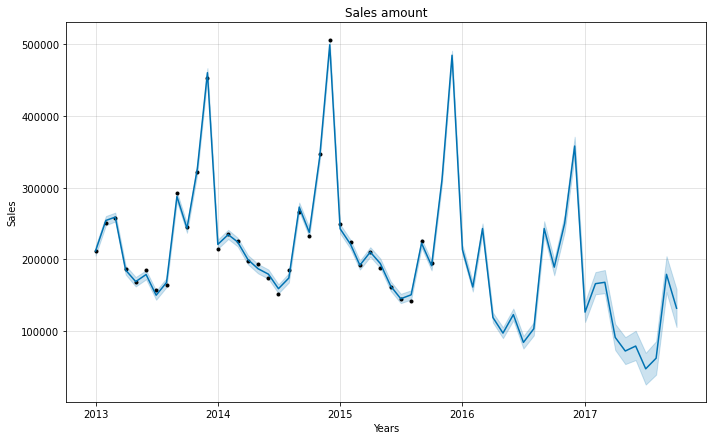

In [119]:
model.plot(forecast);
plt.title('Sales amount')
plt.xlabel('Years')
plt.ylabel('Sales')

In [120]:
from prophet.plot import plot_plotly, plot_components_plotly

In [121]:
plot_plotly(model, forecast)

<AxesSubplot:xlabel='ds'>

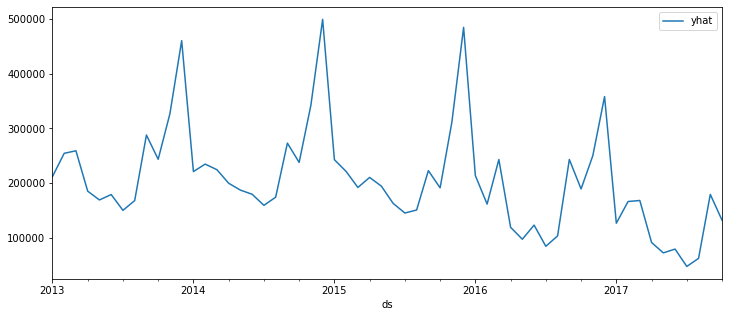

In [122]:
forecast.plot(x='ds',y='yhat',figsize=(12,5))

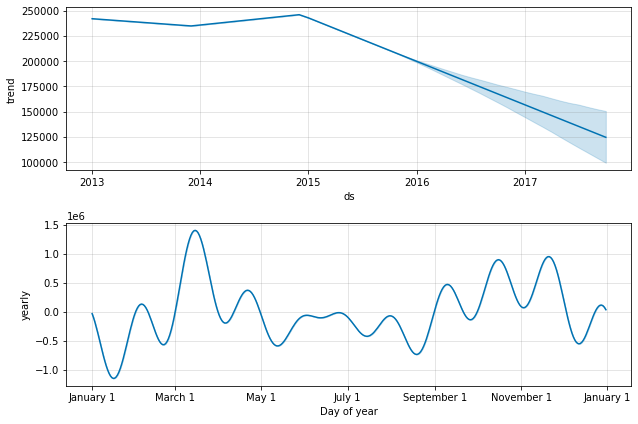

In [123]:
model.plot_components(forecast);

<a id ='8'></a>
# Future Scope

### Algorithms to Try Out:

1. **SARIMA with Different Parameters:**
   - Experiment with SARIMA models using various combinations of seasonal (365 for yearly data) and non-seasonal orders (P, D, Q).

2. **SARIMAX with Exogenous Regressors:**
   - Utilize SARIMAX models where additional features from the dataset (exogenous regressors) can be incorporated to potentially improve forecasting accuracy.

3. **LSTM (Long Short-Term Memory):**
   - Explore deep learning techniques like LSTM, known for their effectiveness in handling time-series data.

4. **NeuralProphet:**
   - Experiment with NeuralProphet, a framework that combines deep learning with Facebook Prophet for potentially enhanced performance in time series forecasting.

5. **Specialized Time Series Frameworks:**
   - Consider using specialized time series frameworks like Darts, ThymeBoost, or LGBM (LightGBM) to benefit from their specific advantages in terms of efficiency, ease of use, and potentially improved performance.

### Feature Engineering:

1. **Additional Features:**
   - Utilize additional features derived from timestamp data, such as sine and cosine signals of time-related attributes (day, week, etc.) to enhance feature representation.

2. **Data Preprocessing Techniques:**
   - Experiment with scaling data, removing or adding different features, and employing various preprocessing techniques to improve model performance.

### Challenges to Address:

1. **Memory Constraints:**
   - Address issues related to memory constraints on platforms like Google Colab by optimizing code, reducing memory usage, or considering alternative computing resources.

2. **Hyperparameter Tuning:**
   - Investigate hyperparameter optimization techniques to explore more precise configurations for models while handling resource constraints efficiently.

3. **Time and Resource Management:**
   - Consider parallel processing or distributing computations where feasible to manage resource-intensive tasks effectively.

In summary, the future scope involves exploring various algorithms, incorporating additional features, leveraging specialized frameworks, and addressing challenges such as memory constraints and hyperparameter tuning to enhance the accuracy and performance of time series forecasting models. Experimentation, optimization, and incorporating diverse approaches can lead to improved forecasting results and model robustness.